**Abdullah Ash Saki**  
Enabling Technologies Researcher @ IBM Quantum  
saki@ibm.com

**Pedro Rivero**  
Technical Lead @ IBM Quantum  
pedro.rivero@ibm.com

# Primitives V2

## Sampler

In [1]:
from qiskit.circuit import Parameter, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.primitives import StatevectorSampler as Sampler

import numpy as np

In [33]:
# Define our circuit registers, including classical registers called 'alpha' and 'beta'.
qreg = QuantumRegister(3)
alpha = ClassicalRegister(2, "alpha")
beta = ClassicalRegister(1, "beta")

# Define a quantum circuit with two parameters.
circuit = QuantumCircuit(qreg, alpha, beta)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.ry(Parameter("a"), 0)
circuit.rz(Parameter("b"), 0)
circuit.cx(1, 2)
circuit.cx(0, 1)
circuit.h(0)
circuit.measure([0, 1], alpha)
circuit.measure([2], beta)

In [3]:
# Define a sweep over parameter values, where the second axis is over 
# the two parameters in the circuit.
params = np.column_stack([
    np.linspace(-np.pi, np.pi, 100), 
    np.linspace(-4 * np.pi, 4 * np.pi, 100)
])

params.shape

(100, 2)

In [4]:
# Instantiate a new statevector simulation based sampler object.
sampler = Sampler()

# Start a job that will return shots for all 100 parameter value sets.
pub = (circuit, params)
job = sampler.run([pub], shots=256)

In [5]:
# Retrieve the primitive result
job.result()

PrimitiveResult([PubResult(data=DataBin<100>(alpha=BitArray(<shape=(100,), num_shots=256, num_bits=2>), beta=BitArray(<shape=(100,), num_shots=256, num_bits=1>)), metadata={'shots': 256})], metadata={})

In [6]:
# Extract the result for the 0th pub (this example only has one pub).
result = job.result()[0]
result

PubResult(data=DataBin<100>(alpha=BitArray(<shape=(100,), num_shots=256, num_bits=2>), beta=BitArray(<shape=(100,), num_shots=256, num_bits=1>)), metadata={'shots': 256})

In [7]:
# Pub results have data
result.data

DataBin<100>(alpha=BitArray(<shape=(100,), num_shots=256, num_bits=2>), beta=BitArray(<shape=(100,), num_shots=256, num_bits=1>))

In [8]:
# Pub results have metadata
result.metadata

{'shots': 256}

In [31]:
from dataclasses import fields, asdict
asdict(result.data).keys()

dict_keys(['evs', 'stds'])

In [11]:
# We can turn the data from the 22nd sweep index into a counts dict.
result.data.alpha.get_counts(22)

{'00': 100, '11': 131, '10': 16, '01': 9}

In [12]:
# Yo can also access the samples directly (i.e. `memory=True`)
result.data.alpha.get_bitstrings(22)

['00',
 '00',
 '11',
 '00',
 '11',
 '00',
 '10',
 '11',
 '11',
 '11',
 '11',
 '11',
 '00',
 '00',
 '10',
 '11',
 '00',
 '11',
 '11',
 '00',
 '00',
 '11',
 '00',
 '10',
 '00',
 '01',
 '10',
 '00',
 '11',
 '00',
 '00',
 '00',
 '10',
 '00',
 '11',
 '11',
 '11',
 '11',
 '00',
 '00',
 '00',
 '00',
 '00',
 '11',
 '00',
 '11',
 '00',
 '11',
 '00',
 '11',
 '00',
 '11',
 '10',
 '11',
 '00',
 '00',
 '00',
 '10',
 '00',
 '00',
 '11',
 '11',
 '01',
 '00',
 '11',
 '11',
 '00',
 '11',
 '00',
 '00',
 '11',
 '11',
 '11',
 '00',
 '11',
 '00',
 '11',
 '00',
 '11',
 '11',
 '11',
 '00',
 '00',
 '11',
 '10',
 '11',
 '11',
 '11',
 '10',
 '11',
 '00',
 '11',
 '00',
 '11',
 '11',
 '01',
 '11',
 '11',
 '00',
 '00',
 '11',
 '01',
 '11',
 '11',
 '00',
 '11',
 '00',
 '11',
 '10',
 '00',
 '11',
 '00',
 '00',
 '00',
 '00',
 '00',
 '00',
 '11',
 '00',
 '01',
 '00',
 '11',
 '00',
 '01',
 '11',
 '00',
 '00',
 '11',
 '11',
 '00',
 '11',
 '00',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',

In [13]:
# Or, for low-level applications, we can work directly with the binary data.
result.data.alpha.array

array([[[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [2]],

       ...,

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]],

       [[3],
        [3],
        [3],
        ...,
        [3],
        [3],
        [3]]], dtype=uint8)

## Estimator

In [14]:
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.quantum_info import Pauli, SparsePauliOp

import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Define a circuit with two parameters.
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(Parameter("a"), 0)
circuit.rz(Parameter("b"), 0)
circuit.cx(0, 1)
circuit.h(0)

In [16]:
# Define a sweep over parameter values, where the second axis is over
# the two parameters in the circuit.
params = np.column_stack([
    np.linspace(-np.pi, np.pi, 100),
    np.linspace(-4 * np.pi, 4 * np.pi, 100)
])

In [17]:
# Define three observables. Many formats are supported here including classes
# such as qiskit.quantum_info.SparsePauliOp. The inner length-1 lists cause this array
# of observables to have shape (3, 1), rather than shape (3,) if they were omitted.
observables = [[SparsePauliOp(["XX", "IY"], [0.5, 0.5])], [Pauli("XX")], [Pauli("IY")]]

In [18]:
# Instantiate a new statevector simulation based estimator object.
estimator = Estimator()

# Estimate the expectation value for all 300 combinations of observables and parameter
# values, where the pub result will have shape (3, 100). This shape is due to our array
# of parameter bindings having shape (100,), combined with our array of observables having
# shape (3, 1)
pub = (circuit, observables, params)
job = estimator.run([pub])
# Extract the result for the 0th pub (this example only has one pub).
result = job.result()[0]

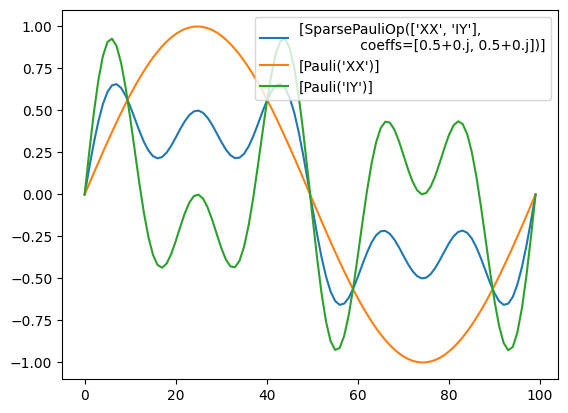

In [19]:
# Pull out the array-based expectation value estimate data from the result and
# plot a trace for each observable.
for idx, pauli in enumerate(observables):
    plt.plot(result.data.evs[idx], label=pauli)
plt.legend()

In [20]:
# Error-bar information is also available, but the error is always 0 for the StatevectorEstimator.
result.data.stds

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.